In [2]:
import torch
import torch.nn as nn
import torchvision

In [3]:
def double_convolution(in_channel, out_channel):
  conv = nn.Sequential(
      nn.Conv2d(in_channel, out_channel, kernel_size=3,padding=1, bias=False),
      nn.BatchNorm2d(out_channel),
      nn.ReLU(inplace=True),

      nn.Conv2d(out_channel, out_channel, kernel_size=3,padding=1, bias=False),
      nn.BatchNorm2d(out_channel),
      nn.ReLU(inplace=True)
  )
  return conv

In [5]:
def center_crop(tensor, target_tensor):
  target_size = target_tensor.size()[2]
  tensor_size = tensor.size()[2]
  delta = tensor_size - target_size
  if delta % 2 == 0:
    delta = delta // 2
    return tensor[:,:,delta:tensor_size-delta,delta:tensor_size-delta]
  delta = delta // 2
  return tensor[:,:,delta:tensor_size-delta-1,delta:tensor_size-delta-1]

In [6]:
class UpBlock(nn.Module):
    def __init__(self, in_channels, out_channels):
        super(UpBlock, self).__init__()
        self.up_sample = nn.Upsample(scale_factor=2, mode='bilinear', align_corners=True)
        self.double_conv = double_convolution(in_channels, out_channels)

    def forward(self, down_input, skip_input):
        x = self.up_sample(down_input)
        x = torch.cat([x, skip_input], dim=1)
        return self.double_conv(x)

In [7]:
class UNet(nn.Module):

    def __init__(self, n_class=6):
        super(UNet,self).__init__()

        # TODO: Define needed layers, use n_class variable in the last layer.
        self.max_pool_2x2 = nn.MaxPool2d(kernel_size=2)
        self.down_dbl_conv_1 = double_convolution(3,64)
        self.down_dbl_conv_2 = double_convolution(64,128)
        self.down_dbl_conv_3 = double_convolution(128,256)
        self.down_dbl_conv_4 = double_convolution(256,512)
        
        self.down_dbl_conv_5 = double_convolution(512,1024)

      
        self.up_dbl_conv_1 = UpBlock(1024+512,512)
        self.up_dbl_conv_2 = UpBlock(512+256,256)
        self.up_dbl_conv_3 = UpBlock(256+128,128)
        self.up_dbl_conv_4 = UpBlock(128+64,64)

        self.final_conv = nn.Conv2d(in_channels=64, out_channels=n_class, kernel_size=1)
    def forward(self, x):

        x1 = self.down_dbl_conv_1(x)
        x2 = self.max_pool_2x2(x1)

        x3 = self.down_dbl_conv_2(x2)
        x4 = self.max_pool_2x2(x3)

        x5 = self.down_dbl_conv_3(x4)
        x6 = self.max_pool_2x2(x5)

        x7 = self.down_dbl_conv_4(x6)
        x8 = self.max_pool_2x2(x7)

        x9 = self.down_dbl_conv_5(x8)
        
       
        x12 = self.up_dbl_conv_1(x9,x7)
     
        x15 = self.up_dbl_conv_2(x12,x5)
       
        x18 = self.up_dbl_conv_3(x15,x3)
   
        x21 = self.up_dbl_conv_4(x18,x1)
   
        out = self.final_conv(x21)

        return out

Epoch 0/59
----------
LR 0.0001


/opt/conda/lib/python3.10/site-packages/torch/optim/lr_scheduler.py:139: UserWarning: Detected call of `lr_scheduler.step()` before `optimizer.step()`. In PyTorch 1.1.0 and later, you should call them in the opposite order: `optimizer.step()` before `lr_scheduler.step()`.  Failure to do this will result in PyTorch skipping the first value of the learning rate schedule. See more details at https://pytorch.org/docs/stable/optim.html#how-to-adjust-learning-rate
  warnings.warn("Detected call of `lr_scheduler.step()` before `optimizer.step()`. "


train: bce: 0.710755, dice: 0.987031, loss: 0.848893
val: bce: 0.719833, dice: 0.990053, loss: 0.854943
saving best model
0m 10s
Epoch 1/59
----------
LR 0.0001
train: bce: 0.652449, dice: 0.982669, loss: 0.817559
val: bce: 0.703628, dice: 0.989708, loss: 0.846668
saving best model
0m 3s
Epoch 2/59
----------
LR 0.0001
train: bce: 0.622283, dice: 0.981656, loss: 0.801969
val: bce: 0.670973, dice: 0.988837, loss: 0.829905
saving best model
0m 3s
Epoch 3/59
----------
LR 0.0001
train: bce: 0.601043, dice: 0.981397, loss: 0.791220
val: bce: 0.631046, dice: 0.987174, loss: 0.809110
saving best model
0m 3s
Epoch 4/59
----------
LR 0.0001
train: bce: 0.582957, dice: 0.981133, loss: 0.782045
val: bce: 0.588666, dice: 0.984898, loss: 0.786782
saving best model
0m 3s
Epoch 5/59
----------
LR 0.0001
train: bce: 0.567495, dice: 0.980987, loss: 0.774241
val: bce: 0.555482, dice: 0.982720, loss: 0.769101
saving best model
0m 3s
Epoch 6/59
----------
LR 0.0001
train: bce: 0.554872, dice: 0.980988, l

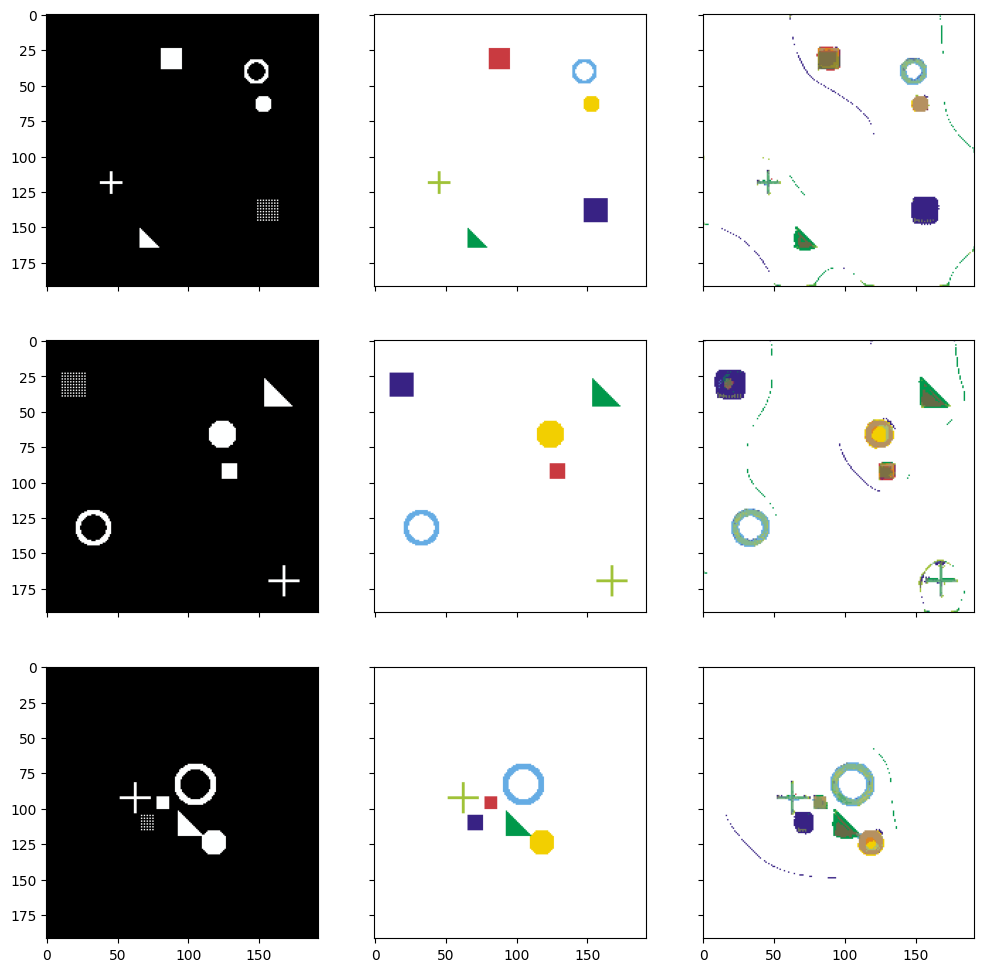

In [8]:
import utility as utils

utils.run(UNet)